In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import geopandas as gpd 
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import sklearn
from sklearn import datasets, linear_model


# The income & voting rate plots  

In [2]:
def merge_Ind_Col(dataframe):
    '''
    Our data frame we read has many index columns and many headers and ti readh a data, a tuple required to reach it and this function merges and decrease the headder and index to one
    :param:dataframe: pandas.dataframe
    :return: rtn:  pandas.dataframe
    '''
    Update_col_names=[]
    for col in dataframe.columns:
        Update_col_names.append(' '.join(col))
    Update_index_names=[]
    for ind in dataframe.index:
        Update_index_names.append(' '.join(ind))
    b=dataframe.values[:,:]
    rtn=pd.DataFrame(b,columns=Update_col_names,index=Update_index_names)
    return rtn

In [3]:
# We plot the income and voting rate correlation 
census_data_table_7=pd.read_excel('../US_census//table07.xlsx',skiprows=4,skipfooter= 96,header=[0, 1,2],index_col=[0,1]).fillna(method='ffill')
census_data_table_7.name='Table 7. Family Members, by Age and Family Income'
census_data_table_7=merge_Ind_Col(census_data_table_7)
census_data_table_7.head()

c:\Users\mbagci\Anaconda3\envs\myenv\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Total population Unnamed: 2_level_1 Unnamed: 2_level_2,United States citizen Total Citizen Population Unnamed: 3_level_2,United States citizen Reported registered Number,United States citizen Reported registered Percent,United States citizen Reported not registered Number,United States citizen Reported not registered Percent,United States citizen No response to registration1 Number,United States citizen No response to registration1 Percent,United States citizen Reported voted Number,United States citizen Reported voted Percent,United States citizen Reported not voted Number,United States citizen Reported not voted Percent,United States citizen No response to voting2 Number,United States citizen No response to voting2 Percent,Total population Reported registered Percent,Total population Reported voted Percent
18 YEARS AND OVER Total,180221.0,164884.0,122156.0,74.1,17083.0,10.4,25645.0,15.6,113051.0,68.6,26769.0,16.2,25064.0,15.2,67.8,62.7
"18 YEARS AND OVER Under $10,000",3083.0,2571.0,1523.0,59.2,629.0,24.5,419.0,16.3,1212.0,47.1,997.0,38.8,362.0,14.1,49.4,39.3
"18 YEARS AND OVER $10,000 to $14,999",3359.0,2762.0,1745.0,63.2,645.0,23.4,371.0,13.4,1392.0,50.4,1011.0,36.6,358.0,13.0,52.0,41.5
"18 YEARS AND OVER $15,000 to $19,999",3327.0,2833.0,1637.0,57.8,787.0,27.8,409.0,14.4,1412.0,49.8,1048.0,37.0,374.0,13.2,49.2,42.4
"18 YEARS AND OVER $20,000 to $29,999",9142.0,7774.0,5124.0,65.9,1661.0,21.4,989.0,12.7,4357.0,56.1,2475.0,31.8,942.0,12.1,56.0,47.7


In [4]:
# read the required data and make calculations 
voting_per=census_data_table_7['United States citizen Reported voted Percent'][1:10].values
voting_num=census_data_table_7['United States citizen Reported voted Number'][1:10].values

print(pearsonr(census_data_table_7['United States citizen Reported voted Percent'][1:10],np.arange(1,10)))
regr = linear_model.LinearRegression()


regr.fit(np.array(voting_per).reshape(-1, 1), np.array(range(1,10)).reshape(-1, 1))


(0.9880241285979198, 6.117084970148885e-07)


LinearRegression()

Text(0.5, 0, 'Voting Percentage')

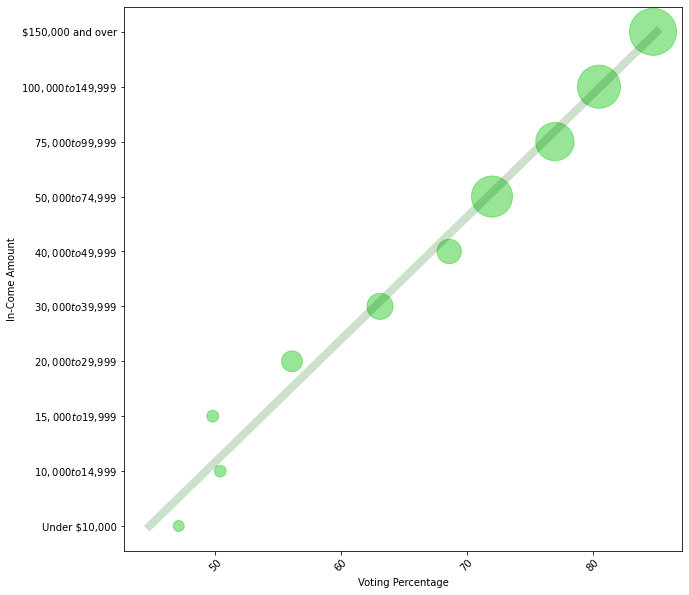

In [5]:
# read the dataset and requred data for ploting 
voting_per=census_data_table_7['United States citizen Reported voted Percent'][1:11].values
voting_num=census_data_table_7['United States citizen Reported voted Number'][1:11]
# Change the font size 
plt.rcParams.update({'font.size': 32})

plt.figure(figsize=[10,10])
# Linear regression model
regr_inc = linear_model.LinearRegression()
regr_inc.fit(np.array(range(1,11)).reshape(-1, 1),voting_per.reshape(-1, 1))
pred_inc=regr_inc.predict(np.arange(1,11).reshape(-1, 1))
plt.plot(pred_inc,np.arange(10), linewidth=8,alpha=0.2,c='darkgreen')
plt.rcParams.update({'font.size': 32})
x_values=['Under $10,000','$10,000 to $14,999',' $15,000 to $19,999','$20,000 to $29,999','$30,000 to $39,999','$40,000 to $49,999','$50,000 to $74,999','$75,000 to $99,999',
          '$100,000 to $149,999','$150,000 and over']
plt.scatter(voting_per,x_values,cmap='darkgreen',s=voting_num/10,c='limegreen',alpha=0.5)

# plt.xticks(np.arange(1,10), x_values)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.ylabel('In-Come Amount')
plt.xlabel("Voting Percentage")


Text(0.5, 0, 'Voting Persontage')

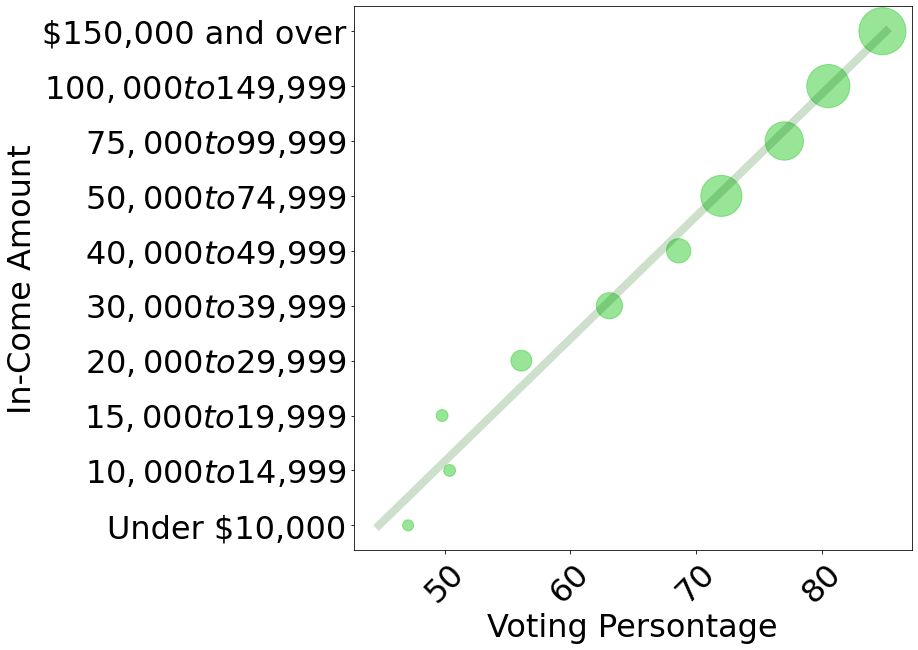

In [6]:
voting_per=census_data_table_7['United States citizen Reported voted Percent'][1:11].values
voting_num=census_data_table_7['United States citizen Reported voted Number'][1:11]

plt.figure(figsize=[10,10])
regr_inc = linear_model.LinearRegression()
regr_inc.fit(np.array(range(1,11)).reshape(-1, 1),voting_per.reshape(-1, 1))
pred_inc=regr_inc.predict(np.arange(1,11).reshape(-1, 1))
plt.plot(pred_inc,np.arange(10), linewidth=8,alpha=0.2,c='darkgreen')
plt.rcParams.update({'font.size': 32})
x_values=['Under $10,000','$10,000 to $14,999',' $15,000 to $19,999','$20,000 to $29,999','$30,000 to $39,999','$40,000 to $49,999','$50,000 to $74,999','$75,000 to $99,999',
          '$100,000 to $149,999','$150,000 and over']
plt.scatter(voting_per,x_values,cmap='darkgreen',s=voting_num/10,c='limegreen',alpha=0.5)

# plt.xticks(np.arange(1,10), x_values)
plt.xticks(rotation = 45) # Rotates X-Axis Ticks by 45-degrees

plt.ylabel('In-Come Amount')
plt.xlabel("Voting Persontage")
